In [162]:
import pandas as pd
import numpy as np
import math
from datetime import datetime
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.style.use("ggplot")

<div class="jumbotron">
    <h1 class="display-1">数据分析</h1>
    <hr class="my-4">
    <p>主讲：李岩</p>
    <p>管理学院</p>
    <p>liyan@cumtb.edu.cn</p>
</div>

> **数据分析的层次**
<center><img src="./img/analysis/analysisHierachy.svg" width=60%></center>

## 数据描述性分析

### 数据基本描述

<center><img src="./img/analysis/chipotle.jpg" width=60%></center>

#### 将数据集存入一个名为chipo的数据框内

In [3]:
chipo = pd.read_csv('./data/analysis/chipotle.csv')

#### 查看前10行内容

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


#### 数据集中有多少个列(columns)

In [5]:
chipo.shape[1]

5

#### 显示全部列名

In [6]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

#### 显示数据集的索引

In [7]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

#### 顾客最爱点哪个商品（item)？

In [8]:
ordered = chipo.groupby(by='item_name').agg({'quantity':'sum'})
ordered.head()
ordered.sort_values(by='quantity',ascending=False)

,quantity
item_name,
6 Pack Soft Drink,55
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,12
Barbacoa Salad Bowl,10


,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351
Chips,230
Steak Bowl,221
Bottled Water,211
Chips and Fresh Tomato Salsa,130


#### 顾客总共买了多少种商品（item)？

In [9]:
ordered.shape[0]

50

#### 下单总量是多少？

In [10]:
ordered['quantity'].sum()

4972

#### 将item_price转换为浮点数(float)

In [11]:
chipo.head()
chipo['item_price'] = chipo['item_price'].map(lambda x: float(x[1:]))
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


#### 在该数据集对应的时期内，该chipotle门店的收入是多少?

##### 新增一列`sub_total`计算每个order的收入

In [12]:
chipo['sub_total'] = chipo['item_price']*chipo['quantity']
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,sub_total
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


##### 计算所有`sub_total`的总和

In [13]:
chipo['sub_total'].sum()

39237.02

#### 该chipotle门店一共有多少订单？

```python
Series.unique()
```
- 返回`Series`中的独特元素构成的数组

```python
Series.nunique(dropna=True)
```
- 计算`Series`中独特元素的个数，默认不计算空值

In [14]:
chipo['order_id'].nunique()

1834

#### 每一单(order)对应的平均总价是多少？

In [15]:
chipo.groupby(by='order_id').agg({'sub_total':'sum'}).mean()

sub_total    21.394231
dtype: float64

### 数据可视化展示

<center><img src="./img/analysis/titanic.jpg" width=60%></center>

#### 读入数据

In [16]:
titanicDf = pd.read_csv('./data/analysis/train.csv')
titanicDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


列名|含义
---|---
PassengerId|乘客ID
Survived|遇难0，生存1
Pclass|船票等级
SibSp|同在船上的兄弟姐妹和配偶人数
Parch|同在船上的父母和子女人数
Ticket|船票号码
Fare|船票价格
Cabin|船舱号码
Embarked|登船港口

#### 识别每个属性的类型

属性|类型
---|---
PassengerId|序列
Survived|标称
Pclass|序列
Name|标称
Sex|标称
Age|比率
SibSp|比率
Parch|比率
Ticket|标称
Fare|比率
Cabin|标称
Embarked|标称

#### 有无重复信息？共有多少乘客？

In [17]:
titanicDf.duplicated().unique()
titanicDf.shape[0]

array([False])

891

#### 将PassengerId设为索引

In [18]:
titanicDf.set_index('PassengerId',inplace=True)
titanicDf.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### `DataFrame`建立索引
```python
DataFrame.set_index(keys, drop=True, inplace=False)
```
- 用1个或多个列，或者名称列表给`DataFrame`设置索引（行名）
- `keys`：可以是单个列列名、由名称构成的列表、`Series`（长度与`DataFrame`的行数一样），或者是前述形式的各种组合
- `drop`：是否将设置为索引的列从`DataFrame`中删除，默认删除

In [19]:
idxDf = pd.DataFrame({'month': [1, 4, 7, 10],
                   'year': [2012, 2014, 2013, 2014],
                   'sale': [55, 40, 84, 31]})
idxDf

,month,year,sale
0,1,2012,55
1,4,2014,40
2,7,2013,84
3,10,2014,31


In [20]:
idxDf.set_index('month')

,year,sale
month,,
1,2012,55
4,2014,40
7,2013,84
10,2014,31


In [21]:
idxDf.set_index(['year','month'])

,,sale
year,month,
2012,1,55
2014,4,40
2013,7,84
2014,10,31


In [22]:
idxDf.set_index([ ,'year'])

,,month,sale
,year,,
1,2012,1,55
2,2014,4,40
3,2013,7,84
4,2014,10,31


#### 用饼图展示船票等级及比例

- 有多少个船票等级？分别是什么？每个等级多少乘客？

In [23]:
titanicDf['Pclass'].nunique()
titanicDf['Pclass'].unique()
classSe = titanicDf['Pclass'].value_counts()

3

array([3, 1, 2], dtype=int64)

#### 更改索引名称
```python
    Series.rename(index=None, inplace=False)
```
- 更改`Series`的索引名称
- `index`：可以是字典、函数

In [24]:
s = pd.Series([100, 200, 300])
s
s.rename({0:'one',2:'three'})
s.rename(lambda x: x**2)

0    100
1    200
2    300
dtype: int64

one      100
1        200
three    300
dtype: int64

0    100
1    200
4    300
dtype: int64

In [25]:
classSe
classSe.rename({3:'普通',1:'高级',2:'中级'},inplace=True)
classSe

3    491
1    216
2    184
Name: Pclass, dtype: int64

普通    491
高级    216
中级    184
Name: Pclass, dtype: int64

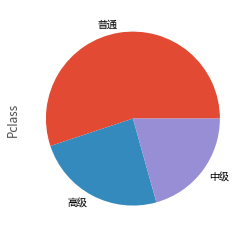

In [26]:
classSe.plot(kind='pie')

#### `pandas`绘图
```python
Series.plot(*args)
DataFrame.plot(x,y,*args)
```
- `kind`：绘图样式类型
    + `line`：线条图
    + `bar`：纵向柱状图
    + `barh`：横向柱状图
    + `hist`：直方图
    + `pie`：饼图
    + `scatter`：散点图
- `figsize`：`(宽,高)`构成的元组，单位英寸
- `title`：`str`，图标题
- `rot`：整数，表示`x`轴和`y`轴刻度的旋转角度
- 针对`DataFrame`，`x`和`y`分别是放在`x`轴的列名和`y`轴的列名

```python
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
```
- 图形能够显示中文字体

```python
plt.style.use('ggplot')
```
- 可选样式[https://matplotlib.org/devdocs/gallery/style_sheets/style_sheets_reference.html](https://matplotlib.org/devdocs/gallery/style_sheets/style_sheets_reference.html)

#### 针对饼图的特有参数
- `explode`：列表，设置每个饼图的楔形体离开中心的距离，该列表的长度与数据的个数一致
- `autopct`：字符串类型或者是函数，显示每个楔形体对应的百分比

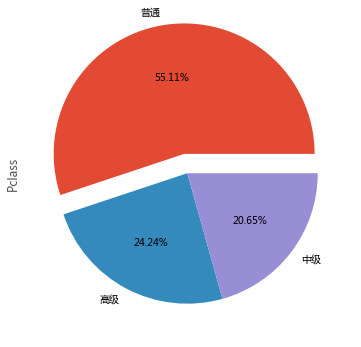

In [27]:
classSe.plot(kind='pie',explode=[0.15,0,0],autopct='%.2f%%',figsize=(12,6))

#### 用柱状图展示在各个港口上船的乘客数量

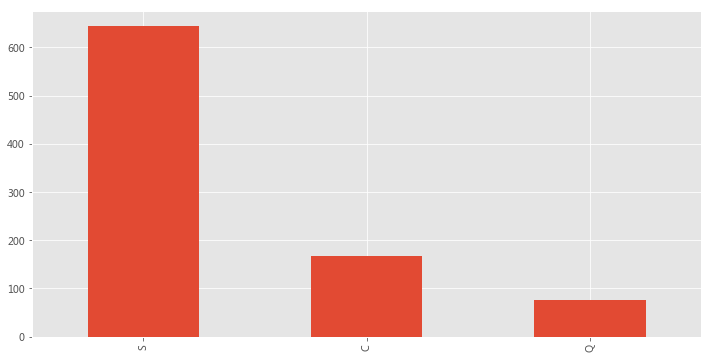

In [28]:
portSe = titanicDf['Embarked'].value_counts()
portSe.plot(kind='bar',figsize=(12,6))

#### 针对柱状图的特有参数
- `color`：单个值或者列表。如果是单个值，改变所有柱形的颜色，如果是列表，为每个柱形配一个颜色
- `edgecolor`：柱形边框颜色。单个值或者列表

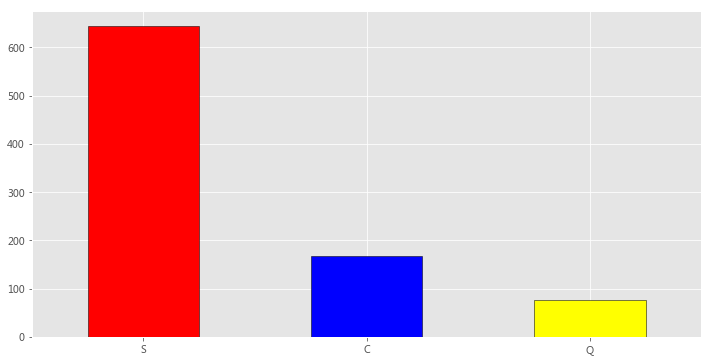

In [29]:
portSe.plot(kind='bar',color=['red','blue','yellow'],figsize=(12,6),edgecolor='black',rot=0)

#### 绘制一个展示船票Fare与乘客年龄和生还与否的散点图

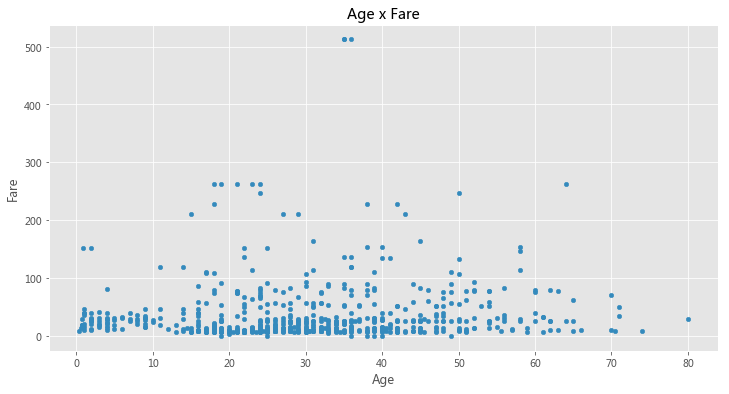

In [30]:
titanicDf.plot(x='Age',y='Fare',kind='scatter',title='Age x Fare',figsize=(12,6))

#### 针对散点图的特有参数
- `s`：点的大小。单个数值或列表。如果是单个数值，所有点被设置成同样大，如果是列表，点的大小按照列表的顺序变化
- `c`：点的颜色。单个数值或列表。如果是单个数值，所有点被设置成同样颜色，如果是列表，点的颜色按照列表的顺序变化

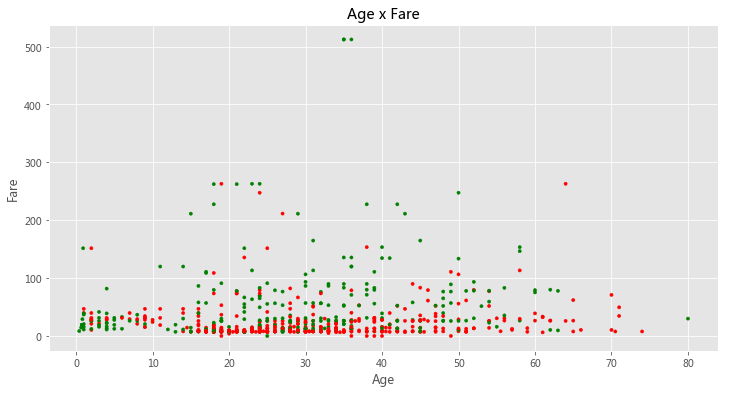

In [31]:
titanicDf.plot(x='Age',y='Fare',kind='scatter',title='Age x Fare',figsize=(12,6),s=10,c=['red' if x==0 else 'green' for x in titanicDf['Survived']])

#### 绘制展示船票价格的直方图

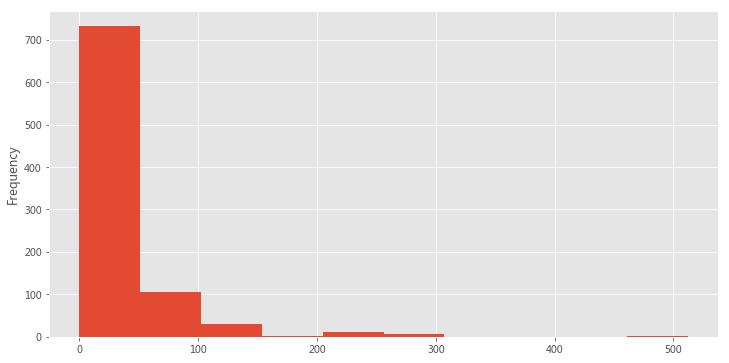

In [32]:
titanicDf['Fare'].plot(kind='hist',figsize=(12,6))

#### 针对直方图特有的参数
- `bins`：整数，划分成的面元（bin）的数量，默认为10

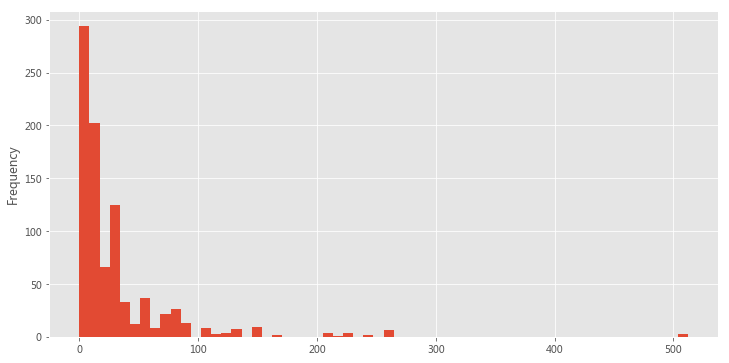

In [33]:
titanicDf['Fare'].plot(kind='hist',bins=60,figsize=(12,6))

#### 同时绘制多列数据

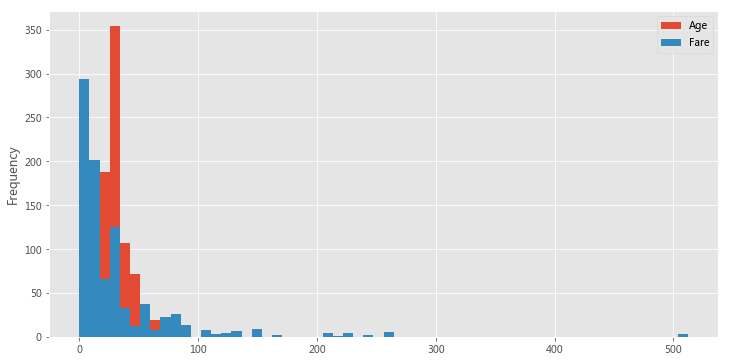

In [122]:
titanicDf.plot(y=['Age','Fare'],kind='hist',bins=60, figsize=(12,6))

- `subplots`：`True`用子图形式展示多列数据；默认是`False`

- `layout`：子图的排列形式。由2个整数构成的元组，分别表示有几行和几列。例如，(1,2)表示1行2列

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000036BACAC8>,
      dtype=object)

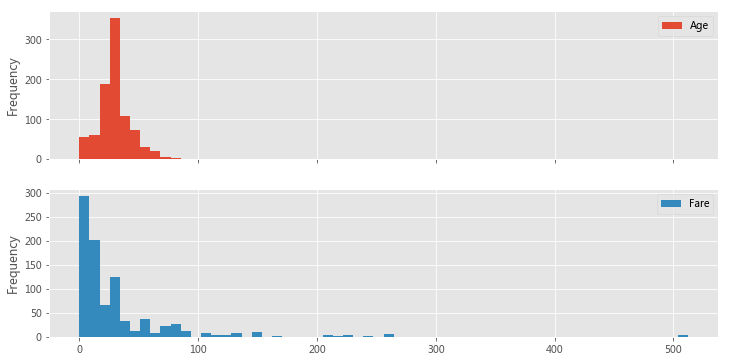

In [132]:
titanicDf.plot(y=['Age','Fare'],kind='hist',bins=60, figsize=(12,6),subplots=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000036A88A58>,
      dtype=object)

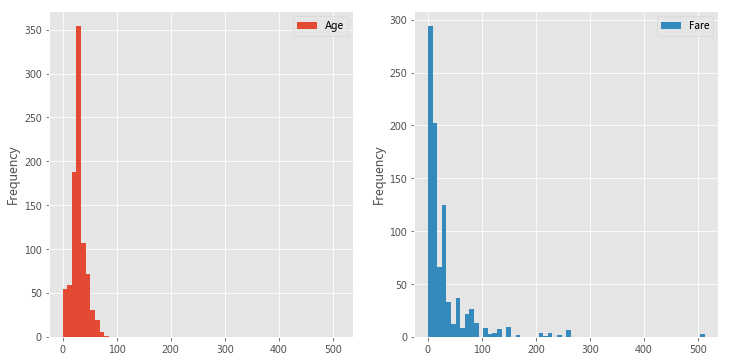

In [134]:
titanicDf.plot(y=['Age','Fare'],kind='hist',bins=60, figsize=(12,6),subplots=True,layout=(1, ))

### 探索时间序列数据

<center><img src="./img/analysis/apple.jpg" width=50%></center>

#### 读取数据

In [148]:
appleDf = pd.read_csv('./data/analysis/Apple_stock.csv')
appleDf.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


#### 查看每列数据类型

In [138]:
appleDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
Date         8465 non-null object
Open         8465 non-null float64
High         8465 non-null float64
Low          8465 non-null float64
Close        8465 non-null float64
Volume       8465 non-null int64
Adj Close    8465 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


#### 将`Date`列转换为`datetime`类型

In [149]:
appleDf['Date'] = pd.to_datetime(appleDf['Date'])
appleDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
Date         8465 non-null datetime64[ns]
Open         8465 non-null float64
High         8465 non-null float64
Low          8465 non-null float64
Close        8465 non-null float64
Volume       8465 non-null int64
Adj Close    8465 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


```python
pandas.to_datetime(arg)
```
- `arg`：需要被转换成时间类型的原数据
- 返回的是一个`datetime`数据类型

In [142]:
pd.to_datetime('now')

Timestamp('2020-03-15 12:20:43.996937')

In [155]:
pd.to_datetime('today')

Timestamp('2020-03-15 20:26:08.783513')

#### 将`Date`设置为索引

In [150]:
appleDf.set_index('Date',inplace=True)
appleDf.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


#### 将`index`设置为升序

In [151]:
appleDf.sort_index(ascending=True,inplace=True)
appleDf.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


#### 找到每个月的最后一个交易日

In [152]:
monthLastDay = appleDf.resample('BM')
monthLastDay.last()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44
...,...,...,...,...,...,...
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83
2014-05-30,637.98,644.17,628.90,633.00,141005200,90.43


#### `resample`函数
```python
DataFrame.resample(rule, axis=0)
```
- `rule`：字符串表示的采样频率
    + `D`：自然天
    + `T/min`：分钟
    + `S`：秒
    + `B`：工作日
    + `M`：月底
    + `BM`：工作月底

#### 数据集中最早的日期和最晚的日期相差多少天？

In [161]:
appleDf.index.max()-appleDf.index.min()

Timedelta('12261 days 00:00:00')

#### 在数据中一共有多少个月？

In [41]:
monthLastDay.first().shape[0]

404

#### 按照时间顺序可视化`Adj Close`和`Close`值

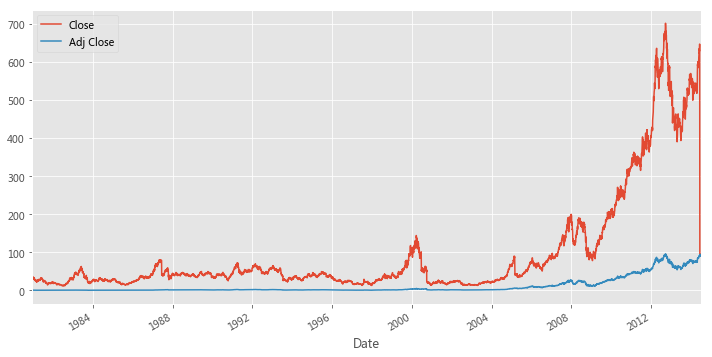

In [42]:
appleDf.plot(y=['Close','Adj Close'],kind='line',figsize=(12,6))

## 数据业务模型

### RFM模型
<center><img src="./img/analysis/rfm.jfif" width=60%></center>

#### 读取数据

In [73]:
rfmDf = pd.read_csv('./data/analysis/rfm_sale.csv')
rfmDf.head()

,Unnamed: 0,USERID,ORDERDATE,ORDERID,AMOUNTINFO
0,0,142074,2018-01-01,4196439032,9399.0
1,1,56927,2018-01-01,4198324983,8799.0
2,2,87058,2018-01-01,4191287379,6899.0
3,3,136104,2018-01-01,4198508313,5999.0
4,4,117831,2018-01-01,4202238313,5399.0


In [74]:
rfmDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76050 entries, 0 to 76049
Data columns (total 5 columns):
Unnamed: 0    76050 non-null int64
USERID        76050 non-null int64
ORDERDATE     76048 non-null object
ORDERID       76050 non-null int64
AMOUNTINFO    76043 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.9+ MB


- 删除无用列

In [75]:
del rfmDf['Unnamed: 0']

#### 重复数据判断与清理

In [76]:
rfmDf.duplicated().value_counts()

False    76050
dtype: int64

- 没有重复记录

#### 缺失数据判断与清理

In [77]:
rfmNa = rfmDf.isna()
rfmNa

,USERID,ORDERDATE,ORDERID,AMOUNTINFO
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
76045,False,False,False,False
76046,False,False,False,False
76047,False,False,False,False
76048,False,False,False,False


In [84]:
rfmDf[rfmNa.values==True]

,USERID,ORDERDATE,ORDERID,AMOUNTINFO
20,75849,2018-01-01,4197103430,NaN
72,103714,NaN,4136159682,189.0
114,155209,2018-01-01,4177940815,NaN
229,139877,NaN,4111956196,6.3
233,54599,2018-01-01,4119525205,NaN
260,65456,2018-01-02,4195643356,NaN
56387,122134,2018-09-21,3826649773,NaN
63260,116995,2018-10-24,3981569421,NaN
71201,98888,2018-12-06,3814398698,NaN


- 删除缺失行

In [85]:
rfmDf.dropna(how='any',axis=0,inplace=True)

In [86]:
rfmDf.shape

(76041, 4)

#### 可视化消费金额

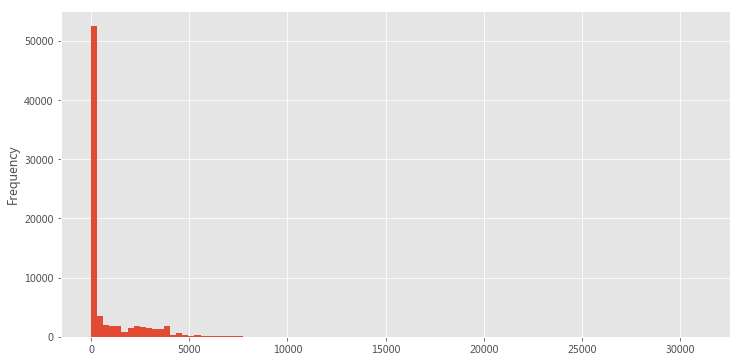

In [89]:
rfmDf['AMOUNTINFO'].plot(kind='hist',bins=100,figsize=(12,6))

- 消费金额的基本信息

In [90]:
rfmDf['AMOUNTINFO'].describe()

count    76041.000000
mean       777.301443
std       1448.300325
min          0.500000
25%         12.500000
50%         65.000000
75%        790.000000
max      30999.000000
Name: AMOUNTINFO, dtype: float64

- 没有金额小于0，不需要进行异常处理

#### 将`ORDERDATE`转变为日期型数据

In [91]:
rfmDf['ORDERDATE']=pd.to_datetime(rfmDf['ORDERDATE'])

In [92]:
rfmDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76041 entries, 0 to 76049
Data columns (total 4 columns):
USERID        76041 non-null int64
ORDERDATE     76041 non-null datetime64[ns]
ORDERID       76041 non-null int64
AMOUNTINFO    76041 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.9 MB


##### 增加一列计算`ORDERDATE`距离今天的间隔

```python
from datetime import datetime
```

In [101]:
rfmDf['INTERVAL'] = (datetime.today()-rfmDf['ORDERDATE']).dt.days

In [102]:
rfmDf.head()

,USERID,ORDERDATE,ORDERID,AMOUNTINFO,INTERVAL
0,142074,2018-01-01,4196439032,9399.0,804
1,56927,2018-01-01,4198324983,8799.0,804
2,87058,2018-01-01,4191287379,6899.0,804
3,136104,2018-01-01,4198508313,5999.0,804
4,117831,2018-01-01,4202238313,5399.0,804


#### 计算R、F、M值

##### 计算最近一次消费

In [106]:
rDf = rfmDf.groupby(by='USERID',sort=False).agg({'INTERVAL':'min'})
rDf.head()

,INTERVAL
USERID,
142074,799
56927,467
87058,666
136104,804
117831,804


##### 计算年消费频次

In [116]:
fDf = rfmDf.groupby(by='USERID',sort=False).agg({'USERID':'count'})
fDf.head()

,USERID
USERID,
142074,2
56927,2
87058,2
136104,1
117831,1


##### 计算年消费金额

In [111]:
mDf = rfmDf.groupby(by='USERID',sort=False).agg({'AMOUNTINFO':'sum'})
mDf.head()

,AMOUNTINFO
USERID,
142074,9408.9
56927,8826.9
87058,11898.0
136104,5999.0
117831,5399.0


##### 将上述三个表合并成一个表

In [113]:
tmp = rDf.merge(fDf,left_index=True,right_index=True)
tmp.head()

,INTERVAL,ORDERID
USERID,,
142074,799,2
56927,467,2
87058,666,2
136104,804,1
117831,804,1


In [115]:
totDf = tmp.merge(mDf,left_index=True,right_index=True)
totDf.head()

,INTERVAL,ORDERID,AMOUNTINFO
USERID,,,
142074,799,2,9408.9
56927,467,2,8826.9
87058,666,2,11898.0
136104,804,1,5999.0
117831,804,1,5399.0


## 数据统计分析

```python
from scipy import stats
```

### 两组样本均值比较

- 推断两个样本的均值是否一样
- 利用`t`检验

#### 问题

- 泰坦尼克生还和未生还人员在年龄和船票价格上有差异吗？

In [43]:
titanicDf.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### 提出假设

In [44]:
titanicDf.groupby(by='Survived').agg({'Fare':'mean','Age':'mean'})

,Fare,Age
Survived,,
0,22.117887,30.626179
1,48.395408,28.343690


<dl class="row alert-info">
    <dt class="col-md-2">假设1：</dt>
    <dd class="col-md-10">生还人员和未生还人员购买的船票价格有显著差异。</dd>
</dl>
<dl class="row alert-danger">
    <dt class="col-md-2">假设2：</dt>
    <dd class="col-md-10">生还人员和未生还人员的年龄有显著差异。</dd>
</dl>

#### 数据预处理

##### 是否有重复记录

In [45]:
titanicDup = titanicDf.duplicated()
titanicDup.value_counts()

False    891
dtype: int64

- 该数据集没有重复记录

##### 是否有缺失值

In [46]:
titanicNa = titanicDf.isna()
titanicNa.sum(axis=0)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

##### 填补缺失值

In [47]:
titanicDf['Age'].fillna(titanicDf['Age'].mean(),inplace=True)

#### 检验假设

##### 生成生还人员的船票价格序列和未生还人员的船票价格序列

In [48]:
fareSurv = titanicDf.loc[titanicDf['Survived']==1,'Fare']
fareUnsurv = titanicDf.loc[titanicDf['Survived']==0,'Fare']

##### 两列的方差是否一样
```python
stats.levene(sample1,sample2)
```
- 检验两个样本的方差是否一样。原假设：两个样本的方差一样
- 返回两个值，分别是检验统计量和$p$值

In [49]:
lstatsFare, lpvFare = stats.levene(fareSurv,fareUnsurv)
print(f'方差相等检验的统计量是{lstatsFare},p值是{lpvFare}')
# print(f'方差相等检验的统计量是{lstatsFare:.3f},p值是{lpvFare:.3f}')

方差相等检验的统计量是45.09964096576531,p值是3.337352710626e-11


- 结论：`fareSurv`和`fareUnsurv`序列的方差**不相等**，假设1成立。

##### 两列的均值是否相等

```python
stats.ttest_ind(sample1,sample2,equal_var=True)
```
- $t$检验，检验两个样本序列的均值是否相等。原假设：两个样本序列的均值相等
- `equal_var`：两个样本序列的方差是否一样，默认一样
- 返回两个值，分别是$t$统计量和$p$值

In [50]:
tstatsFare, tpvFare = stats.ttest_ind(fareSurv,fareUnsurv,equal_var=False)
print(f't检验的统计量是{tstatsFare:.3f}，p值是{tpvFare:.3f}')

t检验的统计量是6.839，p值是0.000


- 结论：`fareSurv`和`fareUnsurv`序列的均值**不相等**。

##### 生成生还人员的年龄序列和未生还人员的年龄序列

In [51]:
ageSurv = titanicDf.loc[titanicDf['Survived']==1,'Age']
ageUnsurv = titanicDf.loc[titanicDf['Survived']==0,'Age']

##### 检验两个序列方差是否一样

In [52]:
lstatsAge, lpvAge = stats.levene(ageSurv,ageUnsurv)
print(f'方差相等检验的统计量是{lstatsAge:.3f},p值是{lpvAge:.3f}')

方差相等检验的统计量是5.481,p值是0.019


- 结论：`ageSurv`和`ageUnsurv`序列的方差**不相等**。

##### 两列均值是否相等

In [53]:
tstatsAge,tpvAge = stats.ttest_ind(ageSurv,ageUnsurv,equal_var=False)
print(f't检验的统计量是{tstatsAge:.3f}，p值是{tpvAge:.3f}')

t检验的统计量是-2.039，p值是0.042


- 结论：ageSurv和ageUnsurv序列的均值**不相等**，假设2成立。